In [14]:
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway, shapiro
import statsmodels.api as sm
import numpy as np
np.set_printoptions(precision=4, suppress=True)

import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

In [15]:
df = pd.read_csv('ANOVA.csv')
df.head()

,n,tau,J_id,ARL_var_CEWMA,ARL_var_Shewhart,Var_CvsS,ARL1_CEWMA,ARL1_Shewhart,ARL1_dif,J_skew,J_kurt
0,10,0.25,0,-0.99818,-0.99902,-0.00084,1.000000,1.000000,0.00000,0,-1.2
1,10,0.25,1,-0.99786,-0.99902,-0.00117,1.000005,1.000005,0.00000,0,-0.6
2,10,0.25,2,-0.99772,-0.99824,-0.00052,1.067822,1.050430,0.01656,0,0.0
3,10,0.25,3,-0.99746,-0.99811,-0.00066,1.185966,1.124171,0.05497,0,1.0
4,10,0.25,4,-0.99719,-0.99795,-0.00076,1.309938,1.220849,0.07297,0,3.0


In [16]:
N = df.n
TAU = df.tau
J = df.J_id
Skew = df.J_skew
Kurt = df.J_kurt
factor_groups = df.groupby(['n','tau', 'J_id'])

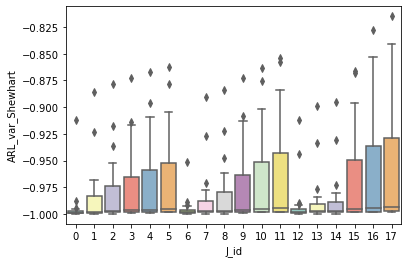

In [6]:
sns.boxplot(x="J_id", y="ARL_var_Shewhart", data=df, palette="Set3")

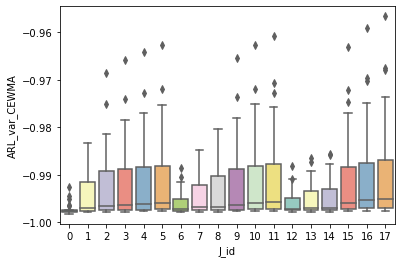

In [7]:
sns.boxplot(x="J_id", y="ARL_var_CEWMA", data=df, palette="Set3")

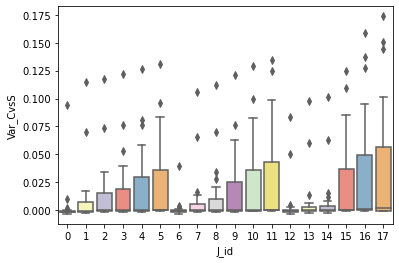

In [8]:
sns.boxplot(x="J_id", y="Var_CvsS", data=df, palette="Set3")

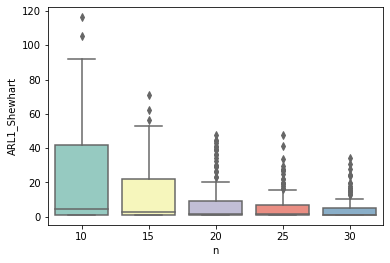

In [5]:
sns.boxplot(x="n", y="ARL_var_Shewhart", data=df, palette="Set3")

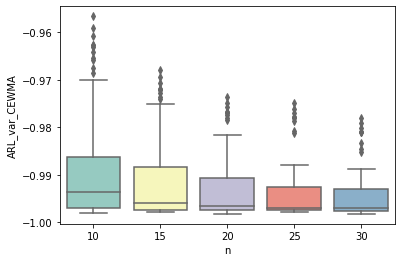

In [9]:
sns.boxplot(x="n", y="ARL_var_CEWMA", data=df, palette="Set3")

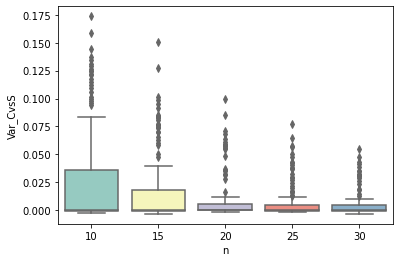

In [10]:
sns.boxplot(x="n", y="Var_CvsS", data=df, palette="Set3")

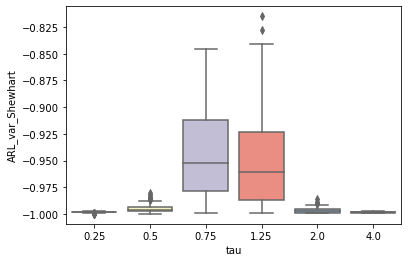

In [11]:
sns.boxplot(x="tau", y="ARL_var_Shewhart", data=df, palette="Set3")

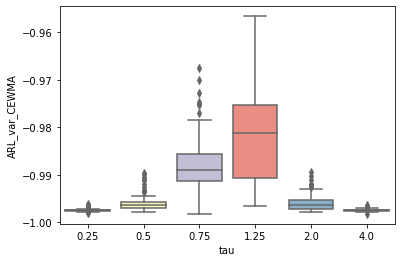

In [12]:
sns.boxplot(x="tau", y="ARL_var_CEWMA", data=df, palette="Set3")

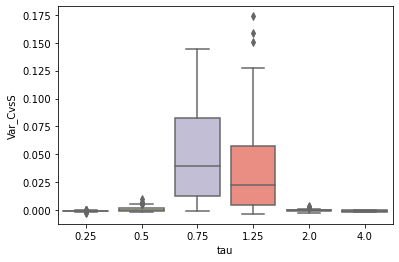

In [13]:
sns.boxplot(x="tau", y="Var_CvsS", data=df, palette="Set3")

In [5]:
fvalue, pvalue = f_oneway(df['ARL_var_CEWMA'], df['ARL_var_Shewhart'])
print('F value:',fvalue)
print('P value:', pvalue)

F value: 72.20545468085712
P value: 6.37356587465641e-17


In [6]:
model = ols("Var_CvsS ~ C(n, Sum) + C(tau, Sum) + C(J_id, Sum) + C(n, Sum):C(tau,Sum) + C(n, Sum):C(J_id,Sum) + C(J_id, Sum):C(tau,Sum)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(model.summary())
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:               Var_CvsS   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     47.74
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          2.47e-175
Time:                        18:23:16   Log-Likelihood:                 2004.6
No. Observations:                 540   AIC:                            -3609.
Df Residuals:                     340   BIC:                            -2751.
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [7]:
model.model.exog_names

['Intercept',
 'C(n, Sum)[S.10]',
 'C(n, Sum)[S.15]',
 'C(n, Sum)[S.20]',
 'C(n, Sum)[S.25]',
 'C(tau, Sum)[S.0.25]',
 'C(tau, Sum)[S.0.5]',
 'C(tau, Sum)[S.0.75]',
 'C(tau, Sum)[S.1.25]',
 'C(tau, Sum)[S.2.0]',
 'C(J_id, Sum)[S.0]',
 'C(J_id, Sum)[S.1]',
 'C(J_id, Sum)[S.2]',
 'C(J_id, Sum)[S.3]',
 'C(J_id, Sum)[S.4]',
 'C(J_id, Sum)[S.5]',
 'C(J_id, Sum)[S.6]',
 'C(J_id, Sum)[S.7]',
 'C(J_id, Sum)[S.8]',
 'C(J_id, Sum)[S.9]',
 'C(J_id, Sum)[S.10]',
 'C(J_id, Sum)[S.11]',
 'C(J_id, Sum)[S.12]',
 'C(J_id, Sum)[S.13]',
 'C(J_id, Sum)[S.14]',
 'C(J_id, Sum)[S.15]',
 'C(J_id, Sum)[S.16]',
 'C(n, Sum)[S.10]:C(tau, Sum)[S.0.25]',
 'C(n, Sum)[S.15]:C(tau, Sum)[S.0.25]',
 'C(n, Sum)[S.20]:C(tau, Sum)[S.0.25]',
 'C(n, Sum)[S.25]:C(tau, Sum)[S.0.25]',
 'C(n, Sum)[S.10]:C(tau, Sum)[S.0.5]',
 'C(n, Sum)[S.15]:C(tau, Sum)[S.0.5]',
 'C(n, Sum)[S.20]:C(tau, Sum)[S.0.5]',
 'C(n, Sum)[S.25]:C(tau, Sum)[S.0.5]',
 'C(n, Sum)[S.10]:C(tau, Sum)[S.0.75]',
 'C(n, Sum)[S.15]:C(tau, Sum)[S.0.75]',
 'C(n, Sum)

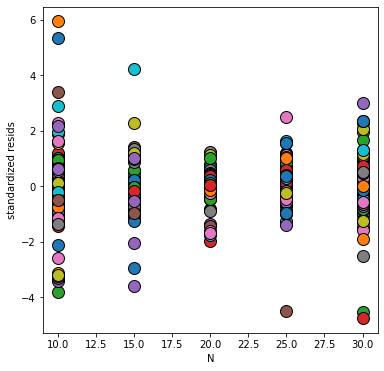

In [13]:
infl = model.get_influence()
resid = infl.resid_studentized_internal
plt.figure(figsize=(6,6))
for values, group in factor_groups:
    i,j,k = values
    idx = group.index
    plt.scatter(N[idx], resid[idx], s=144, edgecolors='black')
    
plt.xlabel('N');
plt.ylabel('standardized resids');

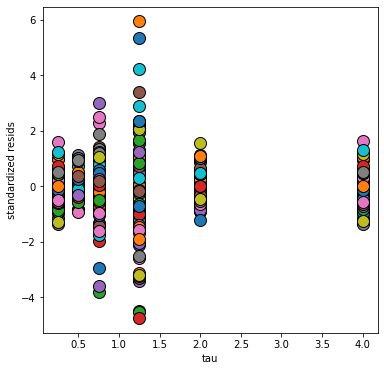

In [15]:
infl = model.get_influence()
resid = infl.resid_studentized_internal
plt.figure(figsize=(6,6))
for values, group in factor_groups:
    i,j,k = values
    idx = group.index
    plt.scatter(TAU[idx], resid[idx], s=144, edgecolors='black')
    
plt.xlabel('tau');
plt.ylabel('standardized resids');

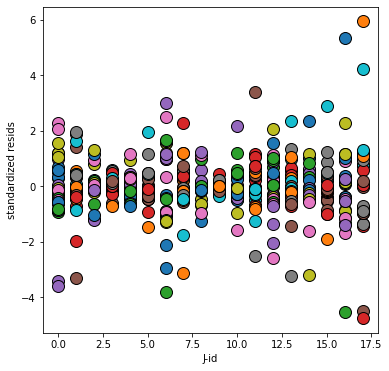

In [16]:
infl = model.get_influence()
resid = infl.resid_studentized_internal
plt.figure(figsize=(6,6))
for values, group in factor_groups:
    i,j,k = values
    idx = group.index
    plt.scatter(J[idx], resid[idx], s=144, edgecolors='black')
    
plt.xlabel('J-id');
plt.ylabel('standardized resids');

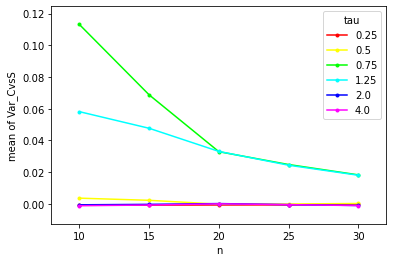

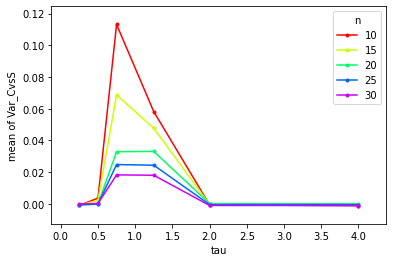

In [17]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig1 = interaction_plot(x=df['n'], trace=df['tau'], response=df['Var_CvsS'])
fig2 = interaction_plot(x=df['tau'], trace=df['n'], response=df['Var_CvsS'])
plt.show()

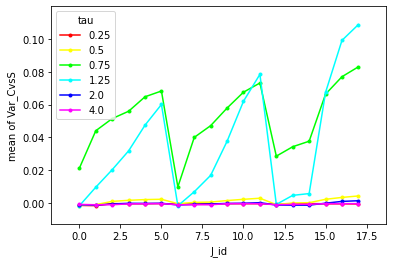

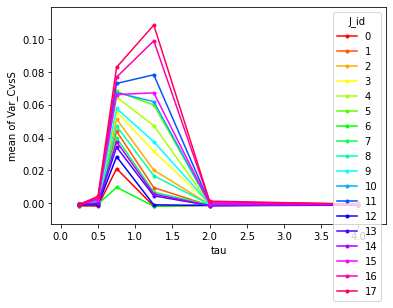

In [18]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig1 = interaction_plot(x=df['J_id'], trace=df['tau'], response=df['Var_CvsS'])
fig1 = interaction_plot(x=df['tau'], trace=df['J_id'], response=df['Var_CvsS'])
plt.show()

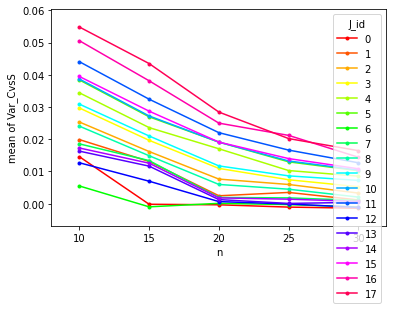

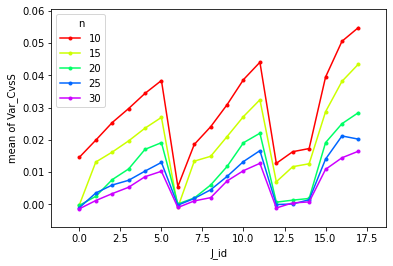

In [19]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig1 = interaction_plot(x=df['n'], trace=df['J_id'], response=df['Var_CvsS'])
fig2 = interaction_plot(x=df['J_id'], trace=df['n'], response=df['Var_CvsS'])
plt.show()

In [20]:
import statsmodels.stats.multicomp as mc

interaction_groups = "n_" + df.n.astype(str) + " & " + "tau_" + df.tau.astype(str)

comp = mc.MultiComparison(df["Var_CvsS"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
n_10 & tau_0.25,n_10 & tau_0.5,0.0045,0.9,-0.0183,0.0274,False
n_10 & tau_0.25,n_10 & tau_0.75,0.1142,0.001,0.0914,0.137,True
n_10 & tau_0.25,n_10 & tau_1.25,0.0591,0.001,0.0363,0.082,True
n_10 & tau_0.25,n_10 & tau_2.0,0.0003,0.9,-0.0225,0.0232,False
n_10 & tau_0.25,n_10 & tau_4.0,-0.0002,0.9,-0.0231,0.0226,False
n_10 & tau_0.25,n_15 & tau_0.25,0.0001,0.9,-0.0227,0.023,False
n_10 & tau_0.25,n_15 & tau_0.5,0.0032,0.9,-0.0197,0.026,False
n_10 & tau_0.25,n_15 & tau_0.75,0.0698,0.001,0.0469,0.0926,True
n_10 & tau_0.25,n_15 & tau_1.25,0.0486,0.001,0.0258,0.0715,True
n_10 & tau_0.25,n_15 & tau_2.0,0.0006,0.9,-0.0222,0.0234,False


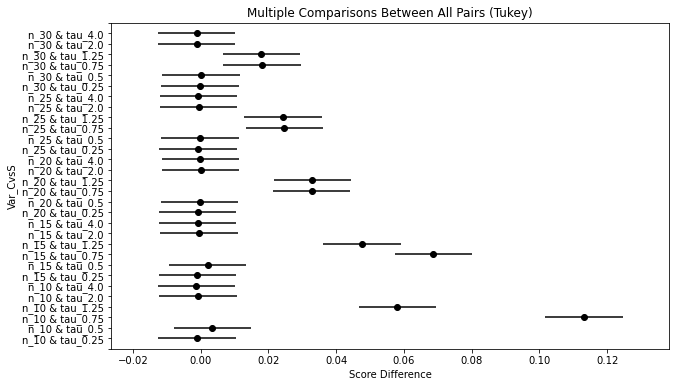

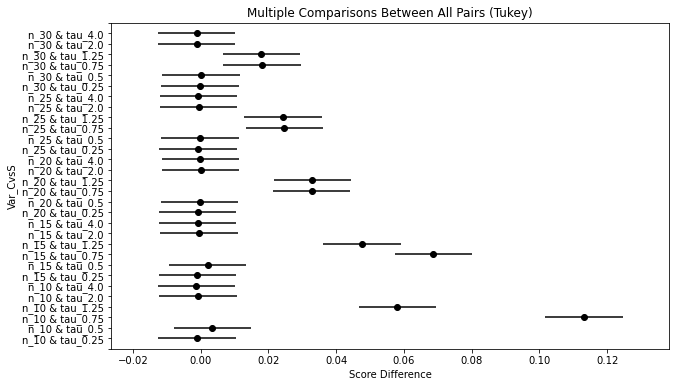

In [21]:
post_hoc_res.plot_simultaneous(ylabel= "Var_CvsS", xlabel= "Score Difference")

In [22]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df, res_var='Var_CvsS', anova_model='Var_CvsS ~ C(n, Sum) + C(tau, Sum) + C(J_id, Sum) + C(n, Sum):C(tau,Sum) + C(n, Sum):C(J_id,Sum) + C(J_id, Sum):C(tau,Sum)')
res.anova_summary


,df,sum_sq,mean_sq,F,PR(>F)
"C(n, Sum)",4.0,0.038964,0.009741,175.628342,2.189450e-81
"C(tau, Sum)",5.0,0.244460,0.048892,881.523192,3.382686e-192
"C(J_id, Sum)",17.0,0.047394,0.002788,50.265280,6.413627e-82
"C(n, Sum):C(tau, Sum)",20.0,0.093956,0.004698,84.701033,7.044250e-119
"C(n, Sum):C(J_id, Sum)",68.0,0.005250,0.000077,1.391972,3.118069e-02
"C(J_id, Sum):C(tau, Sum)",85.0,0.096872,0.001140,20.548333,1.506578e-93
Residual,340.0,0.018857,0.000055,NaN,NaN


In [23]:
res = stat()
res.tukey_hsd(df=df, res_var='Var_CvsS', xfac_var='n', anova_model='Var_CvsS ~ C(n, Sum) + C(tau, Sum) + C(J_id, Sum) + C(n, Sum):C(tau,Sum) + C(n, Sum):C(J_id,Sum) + C(J_id, Sum):C(tau,Sum)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,10,15,0.009246,0.006467,0.012025,12.902229,0.001000
1,10,20,0.017846,0.015067,0.020625,24.902981,0.001000
2,10,25,0.020822,0.018043,0.023602,29.056342,0.001000
3,10,30,0.023000,0.020221,0.025780,32.095292,0.001000
4,15,20,0.008600,0.005821,0.011379,12.000752,0.001000
5,15,25,0.011576,0.008797,0.014356,16.154113,0.001000
6,15,30,0.013754,0.010975,0.016534,19.193063,0.001000
7,20,25,0.002976,0.000197,0.005756,4.153361,0.028987
8,20,30,0.005154,0.002375,0.007934,7.192311,0.001000
9,25,30,0.002178,-0.000602,0.004957,3.038950,0.202038


In [24]:
res = stat()
res.tukey_hsd(df=df, res_var='Var_CvsS', xfac_var='tau', anova_model='Var_CvsS ~ C(n, Sum) + C(tau, Sum) + C(J_id, Sum) + C(n, Sum):C(tau,Sum) + C(n, Sum):C(J_id,Sum) + C(J_id, Sum):C(tau,Sum)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0.25,0.50,0.001790,-0.001392,0.004971,2.279773,0.578562
1,0.25,0.75,0.052273,0.049091,0.055454,66.587562,0.001000
2,0.25,1.25,0.036938,0.033756,0.040120,47.053306,0.001000
3,0.25,2.00,0.000183,-0.002999,0.003365,0.233115,0.900000
4,0.25,4.00,0.000062,-0.003120,0.003244,0.078979,0.900000
5,0.50,0.75,0.050483,0.047301,0.053665,64.307789,0.001000
6,0.50,1.25,0.035148,0.031966,0.038330,44.773533,0.001000
7,0.50,2.00,0.001607,-0.001575,0.004788,2.046657,0.673334
8,0.50,4.00,0.001852,-0.001330,0.005033,2.358751,0.546453
9,0.75,1.25,0.015335,0.012153,0.018517,19.534256,0.001000


In [25]:
res = stat()
res.tukey_hsd(df=df, res_var='Var_CvsS', xfac_var='J_id', anova_model='Var_CvsS ~ C(n, Sum) + C(tau, Sum) + C(J_id, Sum) + C(n, Sum):C(tau,Sum) + C(n, Sum):C(J_id,Sum) + C(J_id, Sum):C(tau,Sum)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0,1,0.005696,-0.001065,0.012457,4.189177,0.225361
1,0,2,0.009363,0.002602,0.016124,6.886107,0.001000
2,0,3,0.012280,0.005519,0.019041,9.031442,0.001000
3,0,4,0.016457,0.009696,0.023219,12.103702,0.001000
4,0,5,0.019215,0.012453,0.025976,14.131609,0.001000
...,...,...,...,...,...,...,...
148,14,16,0.023111,0.016350,0.029872,16.997204,0.001000
149,14,17,0.025926,0.019164,0.032687,19.067277,0.001000
150,15,16,0.007439,0.000677,0.014200,5.470838,0.015325
151,15,17,0.010253,0.003492,0.017015,7.540911,0.001000


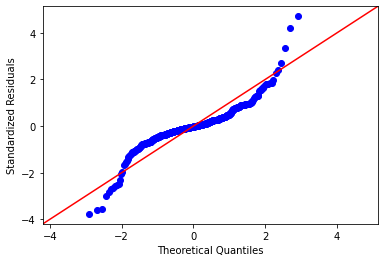

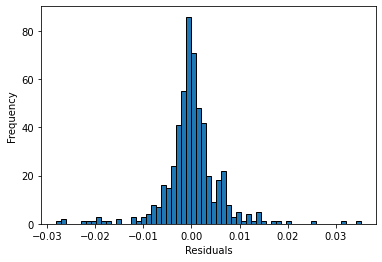

In [26]:
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [27]:
w, pvalue = shapiro(model.resid)
print(w, pvalue)

0.869873046875 8.241872527113514e-21


In [28]:
# Levene’s test can be used to check the Homogeneity of variances 
# when the data is not drawn from normal distribution.
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df, res_var='Var_CvsS', xfac_var='n')
res.levene_summary

,Parameter,Value
0,Test statistics (W),10.9282
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


In [29]:
res = stat()
res.levene(df=df, res_var='Var_CvsS', xfac_var='tau')
res.levene_summary

,Parameter,Value
0,Test statistics (W),91.4426
1,Degrees of freedom (Df),5.0000
2,p value,0.0000


In [30]:
res = stat()
res.levene(df=df, res_var='Var_CvsS', xfac_var='J_id')
res.levene_summary

,Parameter,Value
0,Test statistics (W),2.6959
1,Degrees of freedom (Df),17.0000
2,p value,0.0003


In [ ]:
'''The ANOVA model is remarkably robust to the violation of normality assumption, 
which means that it will have a non-significant effect on Type I error rate and p values 
will remain reliable as long as there are no outliers'''
